In [2]:
from scapy.all import *
import os
import numpy as np

print(os.listdir('.'))

['8e63dc9826b53c29c3a123762f4b7091cd6dfea06dd8897f7b3d7e3681524c41.pcap', '.ipynb_checkpoints', 'Load Time Measurement.ipynb']


In [3]:
packet_capture = rdpcap('8e63dc9826b53c29c3a123762f4b7091cd6dfea06dd8897f7b3d7e3681524c41.pcap')

In [26]:
initial_time = packet_capture[0].time

time_axis = []
data_axis = []

for pkt in packet_capture:
	time_axis.append(pkt.time - initial_time)
	data_axis.append(len(pkt))

uniform_time_axis = np.arange(time_axis[0], time_axis[-1], 0.1)

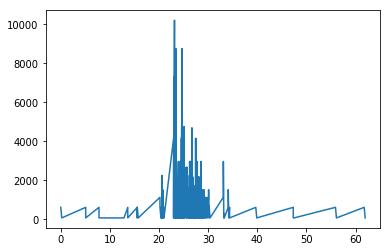

In [27]:
from matplotlib import pyplot as plt
plt.plot(time_axis, data_axis)
plt.show()

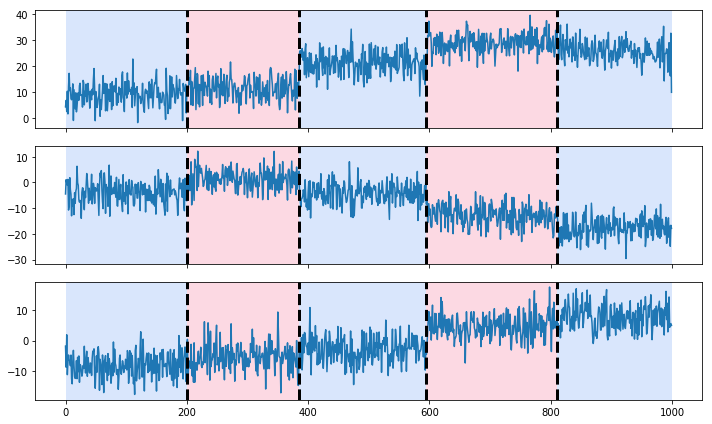

In [23]:
import ruptures as rpt
n_samples, dim, sigma = 1000, 3, 4
n_bkps = 4
signal, bkps = rpt.pw_constant(n_samples, dim, n_bkps, noise_std=sigma)
algo = rpt.Pelt(model="rbf").fit(signal)
result = algo.predict(pen=10)

#rpt.display(signal, bkps, result)
rpt.display(signal, result, result)
plt.show()

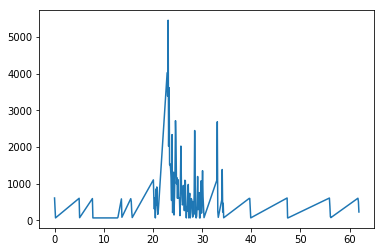

In [28]:
#Create continuous data
import numpy as np
network_trace_continuous = np.interp(uniform_time_axis, time_axis, data_axis)
plt.plot(uniform_time_axis, network_trace_continuous)
plt.show()

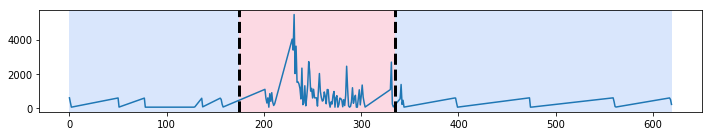

In [33]:
algo2 = rpt.Pelt(model="rbf").fit(network_trace_continuous)
result2 = algo2.predict(pen=18)
rpt.display(network_trace_continuous, result2, result2)
plt.show()

In [35]:
result2[1] - result2[0]

160